# It's Nir Bahadur Raya. It's March 30, 2023. Today, I learned about Polynomial Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(17)
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

In [3]:
X.shape

(200, 1)

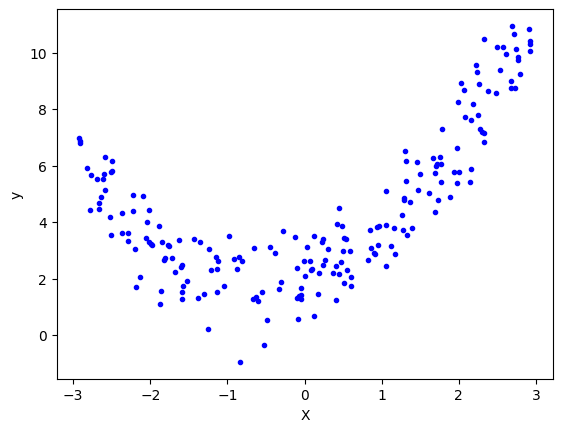

In [4]:
plt.plot(X, y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
X_train.shape

(160, 1)

In [9]:
from sklearn.metrics import r2_score

In [10]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3814078364581638

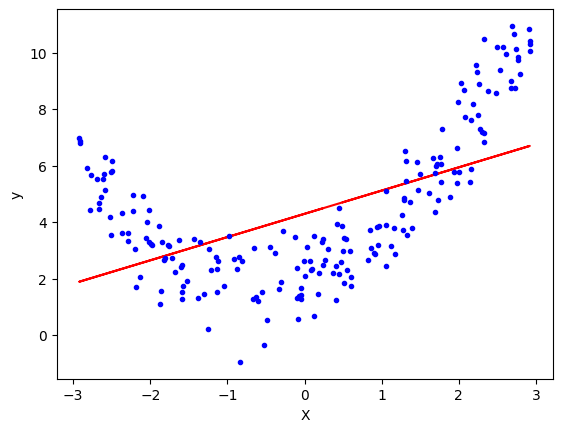

In [11]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [13]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [14]:
X_train_trans.shape

(160, 3)

In [15]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8737947134946781

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.84941031 0.74848276]]
[2.0904084]


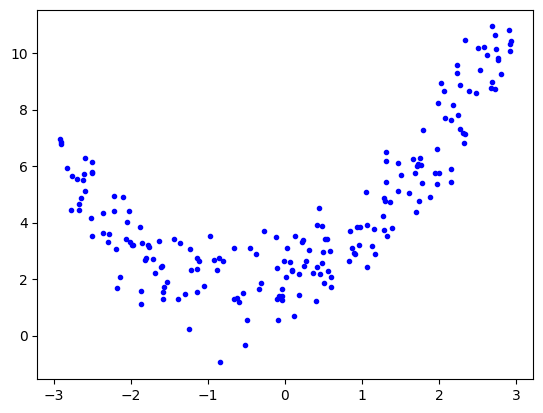

In [18]:
plt.plot(X,y,"b.")
#plt.plot(X_train_trans,y_pred,"r-")

In [19]:
X_train_trans.shape

(160, 3)

In [20]:
y_pred.shape

(40, 1)

In [21]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)

In [22]:
X_new.shape

(200, 1)

In [23]:
X_new_poly = poly.transform(X_new)

In [24]:
X_new_poly.shape

(200, 3)

In [25]:
y_new = lr.predict(X_new_poly)

In [26]:
y_new.shape

(200, 1)

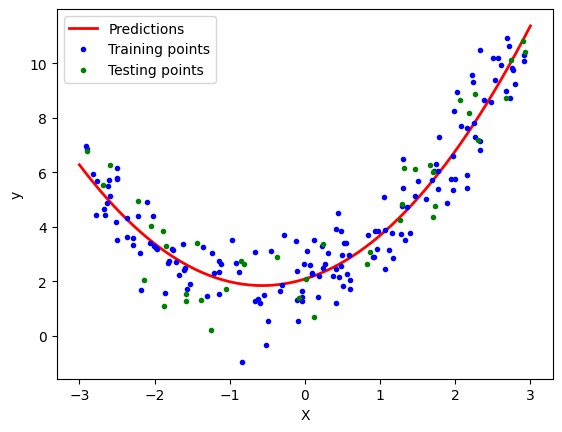

In [27]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()